# Explaining and running CACTUS, an LLM agent for chemistry

Reproducing from https://note.com/qunasys/n/n1b3512fef68b

## Paper

CACTUS: CHEMISTRY AGENT CONNECTING TOOL-USAGE TO
SCIENCE: https://arxiv.org/pdf/2405.00972

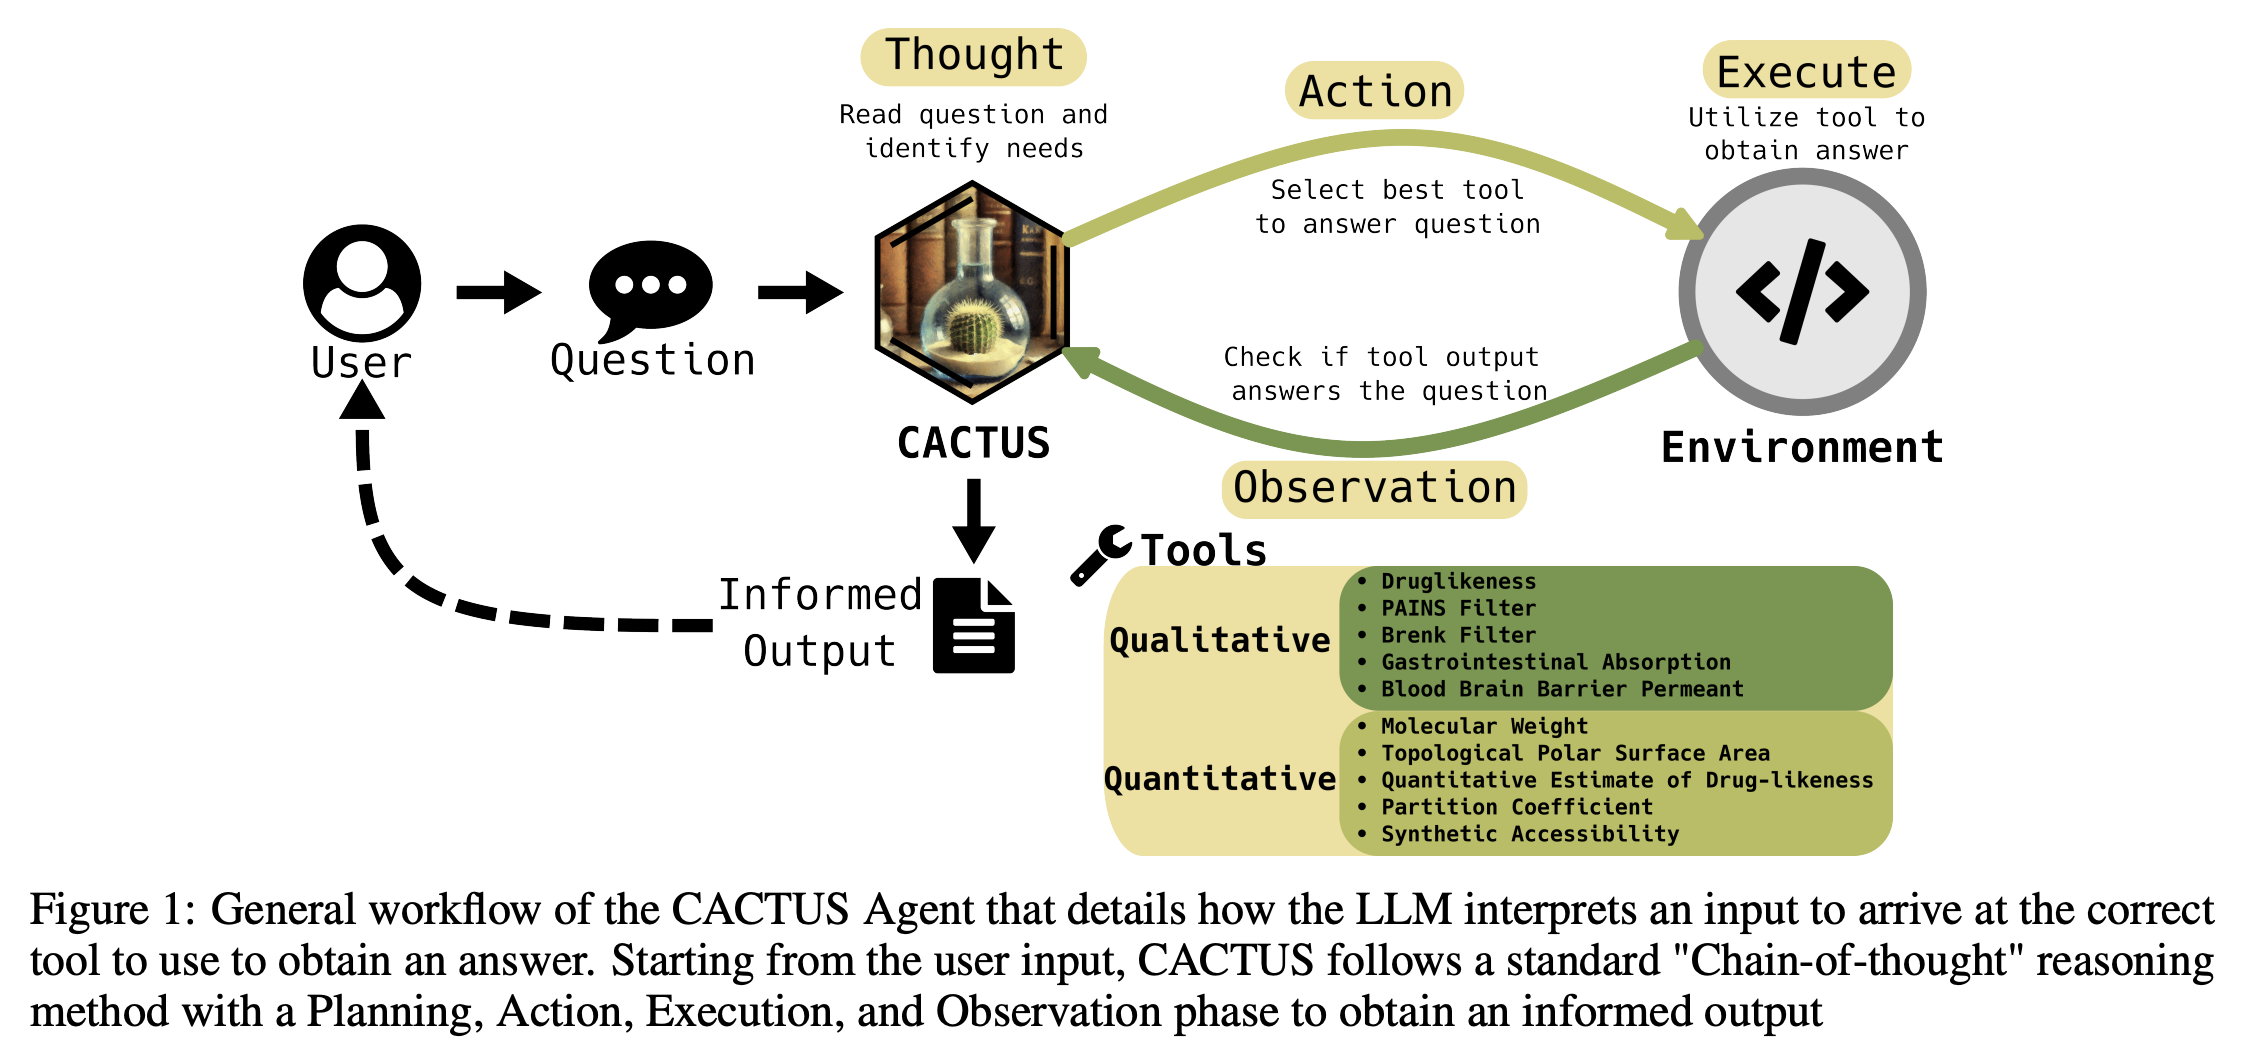

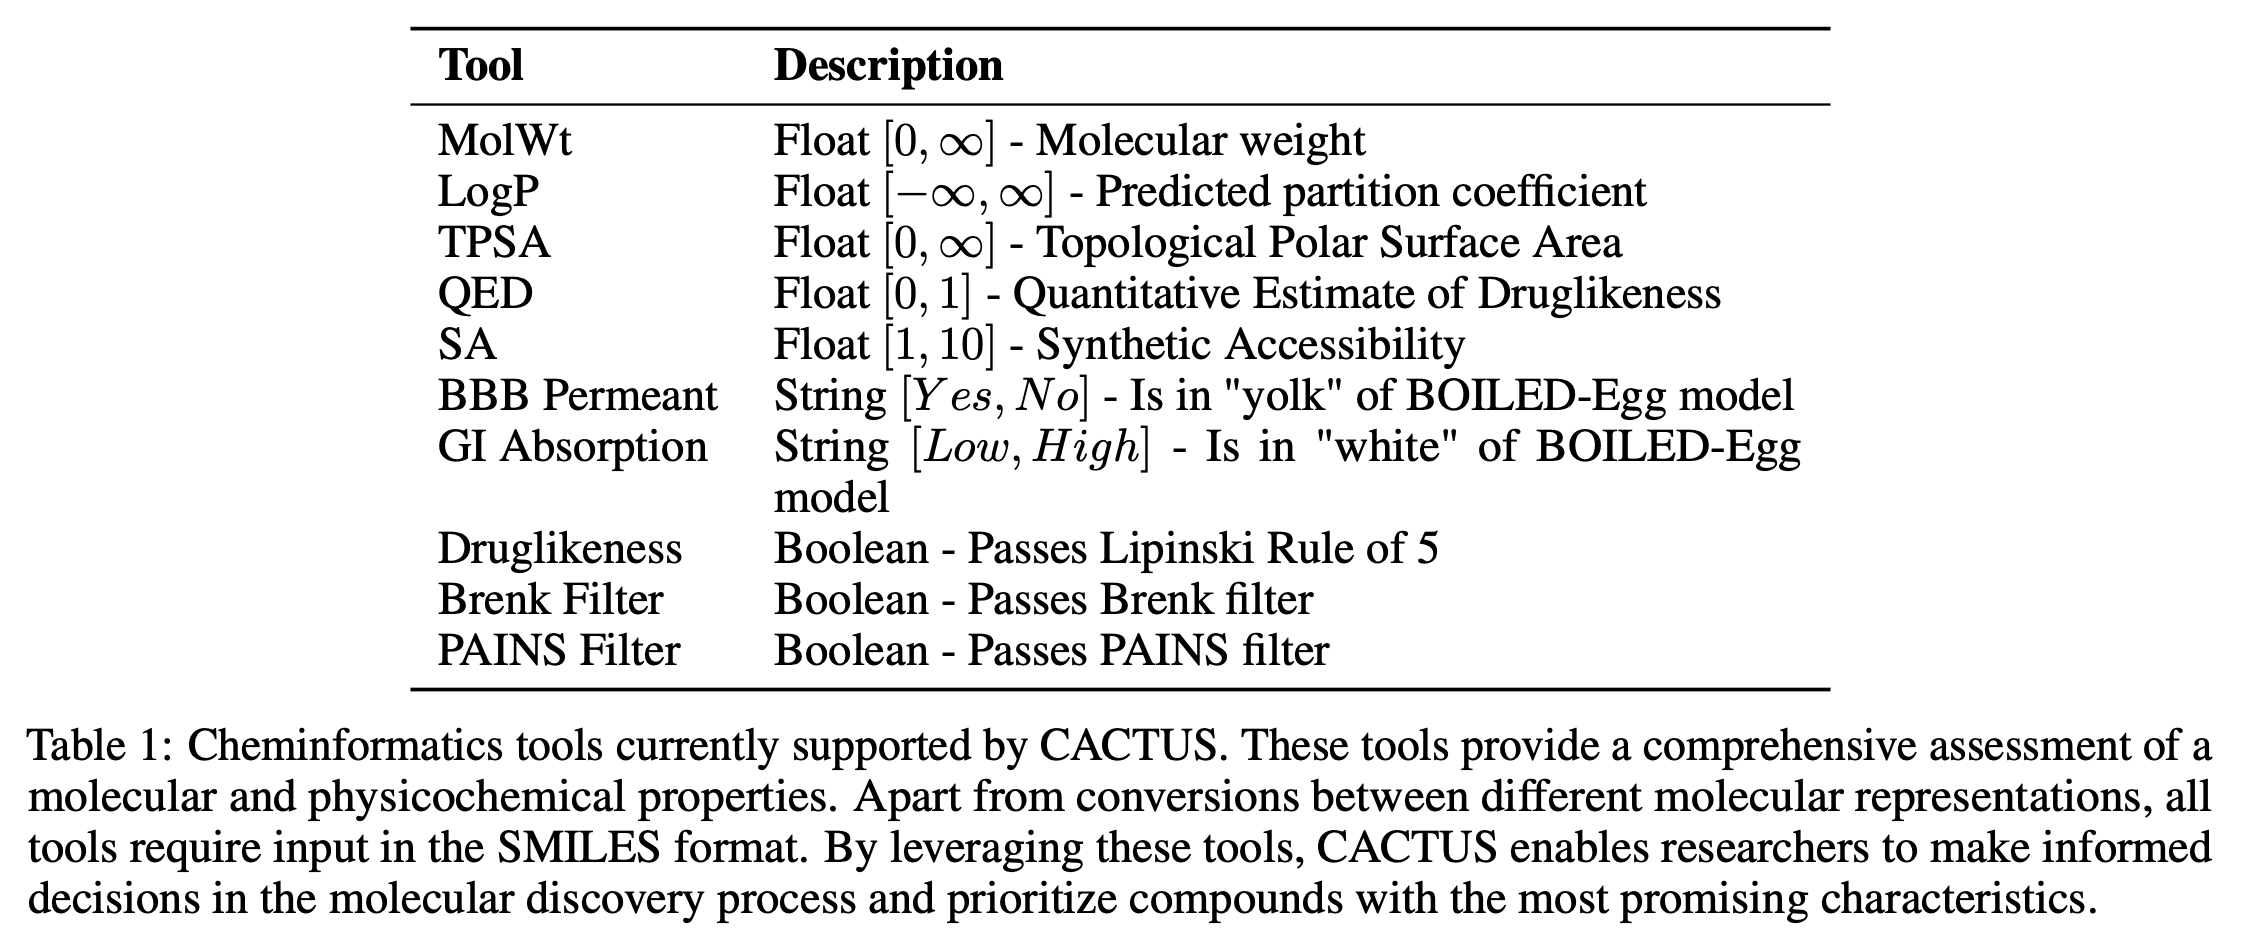

In [ ]:
# takes quite some time ~15 min
!pip install git+https://github.com/pnnl/cactus.git

  Cloning https://github.com/pnnl/cactus.git to /tmp/pip-req-build-clfz93zk
  Running command git clone --filter=blob:none --quiet https://github.com/pnnl/cactus.git /tmp/pip-req-build-clfz93zk
  Resolved https://github.com/pnnl/cactus.git to commit d70fcee2b0afe036952d879ccb7d349007783f10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/mcnaughtonadm/adme-pred-py.git to /tmp/pip-install-gzp4tdo7/adme-pred_d611d4a901c94bdba1615614aa3f0041
  Running command git clone --filter=blob:none --quiet https://github.com/mcnaughtonadm/adme-pred-py.git /tmp/pip-install-gzp4tdo7/adme-pred_d611d4a901c94bdba1615614aa3f0041
  Resolved https://github.com/mcnaughtonadm/adme-pred-py.git to commit d75d476818f71f139c855e07f3a4c51adbdf6bfa
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.

In [ ]:
# Get the key from here
# https://aistudio.google.com/app/prompts

import os
from google.colab import userdata
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [ ]:
from cactus.agent import Cactus
model_answer = {}
Model = Cactus(model_name="gemini-pro", model_type="api")
model_answer[0] = Model.run("What is the molecular weight of the smiles: OCC1OC(O)C(C(C1O)O)O")


<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterMatcherBase> already registered; second conversion method ignored.
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: I need to use the tool CalculateMolecularWeight
Action: CalculateMolecularWeight
Action Input: OCC1OC(O)C(C(C1O)O)O
Observation: 180.063388104
Thought:I now know the final answer
Final Answer: The molecular weight of OCC1OC(O)C(C(C1O)O)O is 180.063388104

> Finished chain.


In [ ]:
model_answer = {}
model_answer[0] = Model.run("Does smiles: OCC1OC(O)C(C(C1O)O)O pass the blood brain barrier?")



> Entering new AgentExecutor chain...
Thought: I need to use the tool CalculateBBBPermeant
Action: CalculateBBBPermeant
Action Input: OCC1OC(O)C(C(C1O)O)O
Observation: No
Thought:I now know the final answer
Final Answer: The compound does not pass the blood brain barrier

> Finished chain.


In [ ]:
SMILES = {0: 'CC(=O)OC1=CC=CC=C1C(=O)O',
       1:'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O',
       2:'CC(=O)NC1=CC=C(O)C=C1',
       3:'C1=CC=C2C(=C1)C3=CC=CC=C3OC4=C2C=CC(=C4)C(=O)O',
       4:'C1=CC=C2C(=C1)C=C(C(=C2)C3=CC4=C(C=C3)N(C=C4)C)C(=O)O',
       5:'CN(C)C1=NC2=C(SC=C2)C=C1C3=CC=CC=C3.Cl'}

Model.run("What is the synthetic accessibility of the smiles: "+ SMILES[0])



> Entering new AgentExecutor chain...
Thought: I need to use the tool CalculateSA
Action: CalculateSA
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O

[07:31:26] DEPRECATION WARNING: please use MorganGenerator



Observation: 1.580039750008826
Thought:I now know the final answer
Final Answer: The synthetic accessibility of CC(=O)OC1=CC=CC=C1C(=O)O is 1.580039750008826

> Finished chain.


'The synthetic accessibility of CC(=O)OC1=CC=CC=C1C(=O)O is 1.580039750008826'